In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

1. Название: Автоматические данные о расходах на галлон

2. Источники:
   (a) Происхождение: этот набор данных был взят из библиотеки StatLib, которая
                поддерживается в Университете Карнеги-Меллона. Набор данных был
                используется в экспозиции Американской статистической ассоциации 1983 года.
   (с) Дата: 7 июля 1993 г.

3. Использование в прошлом:
    - См. 2b (выше)
    - Куинлан, Р. (1993). Сочетание обучения на основе экземпляров и обучения на основе моделей.
       В материалах Десятой международной конференции по машиностроению.
       Обучение, 236–243, Массачусетский университет, Амхерст. Морган
       Кауфманн.

4. Соответствующая информация:

   Этот набор данных представляет собой слегка измененную версию набора данных, предоставленного в
   библиотека StatLib. В соответствии с использованием Россом Куинланом (1993) в
   прогнозируя атрибут "миль на галлон", было удалено 8 исходных экземпляров
   потому что у них были неизвестные значения для атрибута "миль на галлон". Оригинал
   набор данных доступен в файле "auto-mpg.data-original".

   «Данные касаются расхода топлива в городском цикле в милях на галлон,
    быть предсказано с точки зрения 3-х многозначных дискретных и 5-ти непрерывных
    атрибуты» (Куинлан, 1993).

5. Количество экземпляров: 398

6. Количество атрибутов: 9, включая атрибут класса

7. Информация об атрибутах:

    1. миль на галлон: непрерывный
    2. цилиндры: многозначные дискретные
    3. водоизмещение: непрерывное
    4. мощность: непрерывная
    5. вес: непрерывный
    6. ускорение: непрерывное
    7. модельный год: многозначный дискретный
    8. происхождение: многозначный дискретный
    9. название автомобиля: строка (уникальная для каждого экземпляра)

8. Отсутствующие значения атрибута: лошадиные силы имеют 6 отсутствующих значений.

In [26]:
file = pd.read_csv('auto-mpg.data.txt',sep=',')
file

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
389,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
390,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [27]:
#2 Удалить дубликаты строк
pd.options.mode.chained_assignment = None

print("Размер данных до удаления")
shapes = file.shape
print("Количество строк: " + str(shapes[0]))

file.drop_duplicates(inplace=True)
print("\n")

print("Размер данных после удаления")
shapes = file.shape
print("Количество строк: " + str(shapes[0]))

Размер данных до удаления
Количество строк: 392


Размер данных после удаления
Количество строк: 392


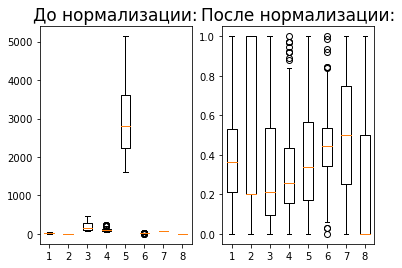

In [28]:
#3 Масштабирование
file.drop(file.columns[8], axis = 1, inplace = True)
plt.subplot(1, 2, 1);
plt.title('До нормализации:', fontsize=17)
plt.boxplot(file);

file = (file - file.min())/(file.max() - file.min());

plt.subplot(1, 2, 2);
plt.title('После нормализации:', fontsize=17)
plt.boxplot(file);

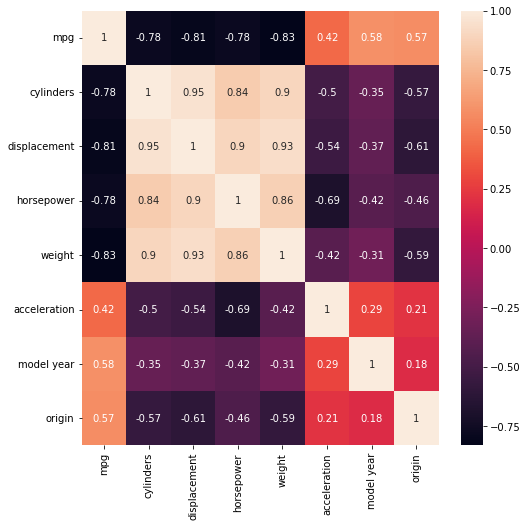

In [29]:
#5 Оценить кореляцию
plt.figure(figsize=(8, 8));

corr = file.corr();

sb.heatmap(corr, annot=True);

In [30]:
#6 поиск пустых значений
file.isnull().mean()

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
model year      0.0
origin          0.0
dtype: float64

In [11]:
#7

In [31]:
x = pd.DataFrame(data=file, columns=["cylinders", "displacement", "horsepower","weight", "acceleration", "model year", "origin"])
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0
1,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0
2,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0
3,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0
4,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0
...,...,...,...,...,...,...,...
387,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0
388,0.2,0.074935,0.032609,0.146583,0.988095,1.0,0.5
389,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0
390,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0


In [32]:
y = pd.Series(file['mpg'])
y

0      0.239362
1      0.159574
2      0.239362
3      0.186170
4      0.212766
         ...   
387    0.478723
388    0.930851
389    0.611702
390    0.505319
391    0.585106
Name: mpg, Length: 392, dtype: float64

In [33]:
#Линейная регрессия без регуляризаторов
#Вариант 1

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10) #размер тестовой выборки 30%

In [37]:
regr = LinearRegression()
regr.fit(x_train, y_train) #обучаем модель на тренировочной выборке

print('Traning data r-squared:', regr.score(x_train, y_train)) #насколько точная train модель
print('Test data r-squared:', regr.score(x_test, y_test)) #насколько точная test модель

print('Intercept', regr.intercept_)
pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=['coef'])

Traning data r-squared: 0.8269466128954017
Test data r-squared: 0.7916697479141038
Intercept 0.49869485480447184


,coef
cylinders,-0.149482
displacement,0.306233
horsepower,-0.153359
weight,-0.576380
acceleration,-0.016444
model year,0.236008
origin,0.082422


In [38]:
x_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)}) #p-value - насколько важен данный параметр
#если >5% (0.05), то данные параметры не очень важны

,coef,p-value
const,0.498695,0.000
cylinders,-0.149482,0.004
displacement,0.306233,0.001
horsepower,-0.153359,0.076
weight,-0.576380,0.000
acceleration,-0.016444,0.754
model year,0.236008,0.000
origin,0.082422,0.000


In [40]:
xs = file.drop(['mpg'], axis=1)
ys = file['mpg'].values.reshape(-1,1)

cv = cross_val_score(regr,xs,ys, cv=10)
mean_cv = np.mean(cv)
print(mean_cv)

0.6426040546895851


In [41]:
y_pred = regr.predict(x_test) #прогнозы по тестовым данным
print('predicted response:', y_pred, sep='\n')

predicted response:
[ 0.48865313  0.56928282  0.3322781   0.73422868  0.21729541  0.29147316
  0.20668032 -0.05622142  0.58906882  0.46930879  0.29630341  0.31970462
  0.52309435  0.57089533  0.07373675  0.14870687  0.31123179  0.52891759
 -0.0484005   0.06071893  0.20884179  0.59476592  0.28194366  0.20486437
  0.12983805  0.04272127  0.22358185  0.62023938  0.39915964  0.30000257
  0.33425383  0.38945916  0.54269393  0.36426968  0.39167304  0.5161381
  0.60908422  0.27955776  0.16131458  0.51211556  0.3304895   0.31592907
  0.57901291  0.47939103  0.37168749  0.08364136  0.14047127  0.6333423
  0.36797948  0.54369385  0.44218738  0.04364324  0.33860422  0.08852613
  0.17275019  0.51352123  0.37166906  0.44841331  0.51613816  0.45995661
  0.64836861  0.41964502  0.32412854  0.3272684   0.62800172  0.52051207
  0.02536147  0.47108326  0.34976434  0.10724674 -0.04754329  0.63764034
  0.45309043  0.61342008  0.55406234  0.34350904  0.2851356   0.17289124
  0.52416268  0.50880664  0.72355

In [42]:
file_2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #реальные и предсказанные значения
file_2

,Actual,Predicted
241,0.332447,0.488653
366,0.531915,0.569283
298,0.396277,0.332278
341,0.694149,0.734229
263,0.226064,0.217295
...,...,...
378,0.611702,0.722865
20,0.425532,0.326712
187,0.172872,0.202640
59,0.292553,0.387259


In [43]:
tochnost = pd.DataFrame({'Accuracy': y_test - y_pred}) # реальные - предсказанные значения = точность решения задачи
tochnost

,Accuracy
241,-0.156206
366,-0.037368
298,0.063998
341,-0.040080
263,0.008768
...,...
378,-0.111163
20,0.098820
187,-0.029767
59,-0.094706


In [44]:
file_2.corr()

,Actual,Predicted
Actual,1.000000,0.893263
Predicted,0.893263,1.000000


In [45]:
 file_2.corr('spearman')

,Actual,Predicted
Actual,1.000000,0.932102
Predicted,0.932102,1.000000


In [ ]:
#2 вариант с учетом p-value

In [47]:
x_2 = pd.DataFrame(data=file, columns=["displacement", "weight", "model year", "origin"])
x_2

,displacement,weight,model year,origin
0,0.617571,0.536150,0.0,0.0
1,0.728682,0.589736,0.0,0.0
2,0.645995,0.516870,0.0,0.0
3,0.609819,0.516019,0.0,0.0
4,0.604651,0.520556,0.0,0.0
...,...,...,...,...
387,0.186047,0.333711,1.0,0.0
388,0.074935,0.146583,1.0,0.5
389,0.173127,0.193365,1.0,0.0
390,0.134367,0.286929,1.0,0.0


In [48]:
x_2_train, x_2_test, y_train, y_test = train_test_split(x_2, y, test_size=0.3, random_state=10) #размер тестовой выборки 30%

In [49]:
regr_2 = LinearRegression()
regr_2.fit(x_2_train, y_train)

print('Traning data r-squared:', regr_2.score(x_2_train, y_train)) #насколько точная train модель
print('Test data r-squared:', regr_2.score(x_2_test, y_test)) #насколько точная test модель

print('Intercept', regr_2.intercept_)
pd.DataFrame(data=regr_2.coef_, index=x_2_train.columns, columns=['coef'])

Traning data r-squared: 0.8193257978808525
Test data r-squared: 0.8076031449686223
Intercept 0.46944762257203054


,coef
displacement,0.057346
weight,-0.627255
model year,0.244139
origin,0.067172


In [50]:
x_incl_const_2 = sm.add_constant(x_2_train)

model_2 = sm.OLS(y_train, x_incl_const_2)
results_2 = model_2.fit()

pd.DataFrame({'coef': results_2.params, 'p-value': round(results_2.pvalues, 3)}) #p-value - насколько важен данный параметр
#если >5% (0.05), то данные параметры не очень важны

,coef,p-value
const,0.469448,0.000
displacement,0.057346,0.326
weight,-0.627255,0.000
model year,0.244139,0.000
origin,0.067172,0.000


In [51]:
y_pred_2 = regr_2.predict(x_2_test) #делаю прогнозы по тестовым данным
print('predicted response:', y_pred_2, sep='\n')

predicted response:
[ 0.48393922  0.56132063  0.35963819  0.73619702  0.23051079  0.33055001
  0.22479736 -0.08826713  0.58133933  0.46571173  0.27137088  0.27464275
  0.5242702   0.55376177  0.07868155  0.17892728  0.3201492   0.52426452
  0.01347999  0.03917496  0.1974185   0.60185752  0.24537148  0.19900887
  0.14131907  0.0265418   0.19223036  0.61098999  0.38305496  0.30479077
  0.32667406  0.37249149  0.54131355  0.36227307  0.39264788  0.53414331
  0.60289492  0.31394596  0.18267307  0.49579163  0.31127901  0.3426106
  0.58717498  0.45007112  0.36094425  0.07175017  0.13317245  0.64931345
  0.37753115  0.54712931  0.45255967  0.05901156  0.30704681  0.11557839
  0.13663467  0.52056246  0.36409863  0.44543457  0.50707284  0.44600245
  0.64986058  0.39627914  0.29879303  0.31789571  0.60492853  0.52895446
 -0.0221457   0.47655893  0.33812119  0.10461709  0.0140429   0.62544757
  0.44392723  0.60665106  0.55363985  0.34872796  0.26134094  0.17070204
  0.50843231  0.51721776  0.7215

In [52]:
file_3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_2}) #реальные и предсказанные значения
file_3

,Actual,Predicted
241,0.332447,0.483939
366,0.531915,0.561321
298,0.396277,0.359638
341,0.694149,0.736197
263,0.226064,0.230511
...,...,...
378,0.611702,0.721566
20,0.425532,0.320921
187,0.172872,0.208732
59,0.292553,0.379420


In [53]:
tochnost_2 = pd.DataFrame({'Accuracy': y_test - y_pred_2}) # реальные - предсказанные значения = точность решения задачи
tochnost_2

,Accuracy
241,-0.151492
366,-0.029406
298,0.036638
341,-0.042048
263,-0.004447
...,...
378,-0.109864
20,0.104611
187,-0.035860
59,-0.086867


In [54]:
file_3.corr()

,Actual,Predicted
Actual,1.00000,0.90067
Predicted,0.90067,1.00000


In [56]:
file_3.corr('spearman')

,Actual,Predicted
Actual,1.000000,0.941535
Predicted,0.941535,1.000000


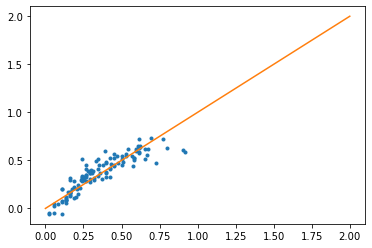

In [57]:
# Прогноз
plt.plot(y_test, y_pred, '.')
x = np.linspace(0, 2, 2)
y = x
plt.plot(x, y)
plt.show()

In [58]:
#предсказания
r2_score(y_test, y_pred)

0.7916697479141038

In [ ]:
#Линейная регрессия RIDGE регуляризатор

In [59]:
ridle = Ridge(alpha=0.1)
ridle.fit(x_train, y_train)
y_train_pred = ridle.predict(x_train)
y_test_pred = ridle.predict(x_test)

In [60]:
cv = cross_val_score(ridle,xs,ys, cv=10)
mean_cv = np.mean(cv)
print(mean_cv)

0.6416679031199743


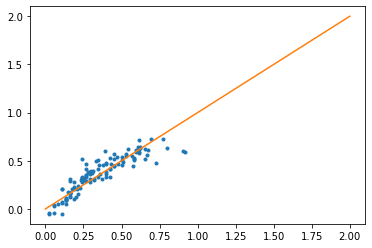

In [61]:
# Прогноз
plt.plot(y_test, y_test_pred, '.')
x = np.linspace(0, 2, 2)
y = x
plt.plot(x, y)
plt.show()

In [62]:
#предсказания
r2_score(y_test, y_test_pred)

0.7933117875357171